## Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

## importing in built datasets

In [9]:
print(sns.get_dataset_names())

C:\Users\Vp\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\Vp\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [11]:
car_df=sns.load_dataset('car_crashes')
car_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Distribution Plots

## Distribution plot

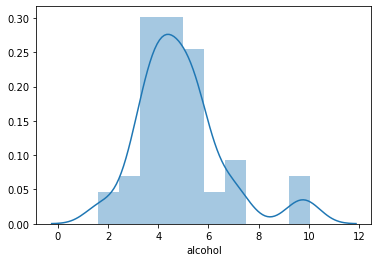

In [19]:
sns.distplot(car_df.alcohol)
#the line in the graph is called kernel density estimation to turn off use kde=false parameter

## Joint plot

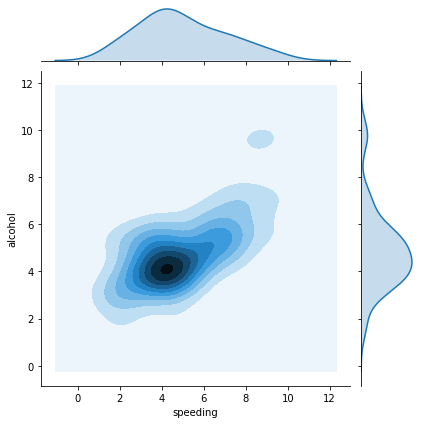

In [28]:
sns.jointplot(x='speeding',y='alcohol',data=car_df,kind='kde')

## Kde plot

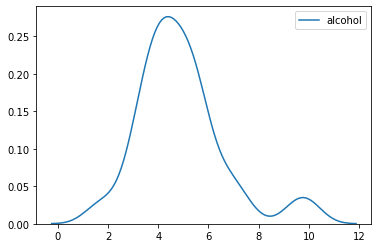

In [30]:
sns.kdeplot(car_df.alcohol)

## Pair plot 

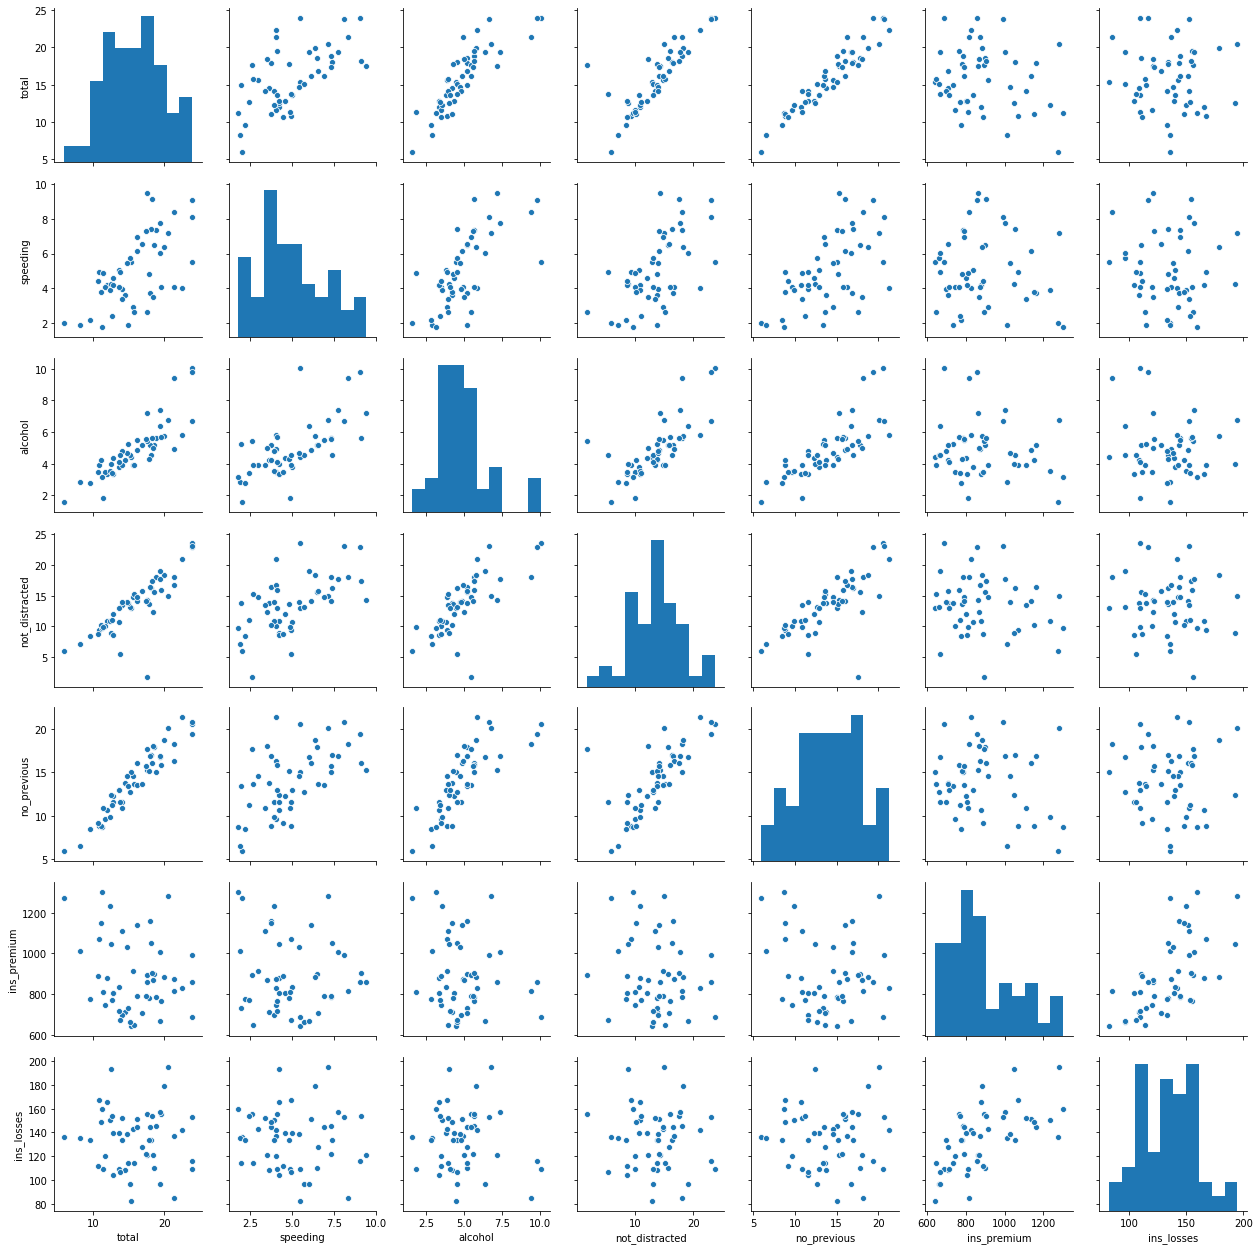

In [33]:
sns.pairplot(car_df)

In [34]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [58]:
tt=sns.load_dataset('tips')
tt

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


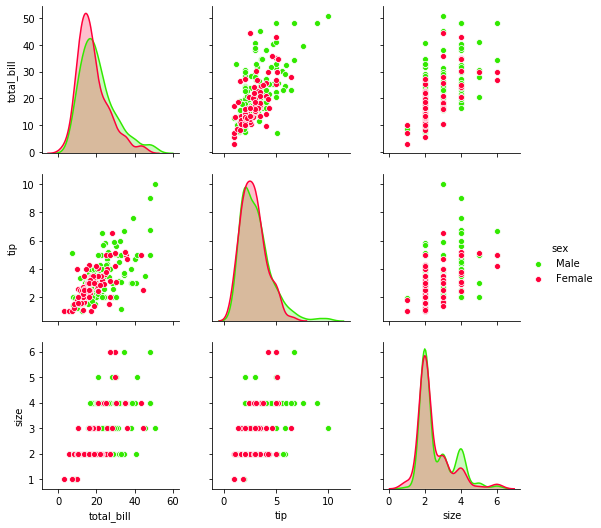

In [66]:
sns.pairplot(tt,hue='sex',palette='prism')
## hue is basically used to insert the categorical value in the plot

## Rug plot

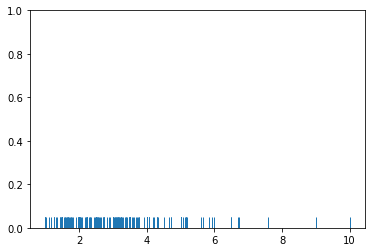

In [69]:
# not really used that much
sns.rugplot(tt.tip)

# Styling (To make our plots look nicer)

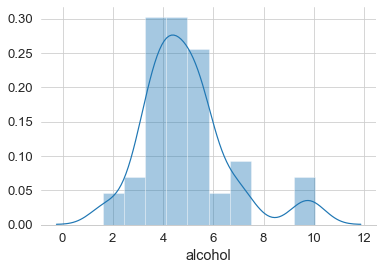

In [92]:
sns.set_style('whitegrid') # to choose the type of background
sns.distplot(car_df.alcohol) 
sns.set_context('paper',font_scale=1.5) # to fix the size of the background
sns.despine(left='true') # to remove left axis ,can also be used to remove bottom axis

# Categorical Plotting

## bar plots

In [122]:
tt.head(9)
fr=np.asarray(tt)
tt[['sex','total_bill']]

,sex,total_bill
0,Female,16.99
1,Male,10.34
2,Male,21.01
3,Male,23.68
4,Female,24.59
...,...,...
239,Male,29.03
240,Female,27.18
241,Male,22.67
242,Male,17.82


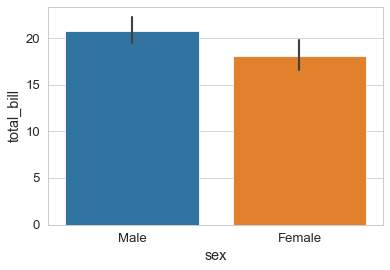

In [123]:
sns.barplot(x=tt.sex,y=tt.total_bill)
# sns.barplot(x=tt.sex,y=tt.total_bill,estimator=?) this is used to change the estimator by default it's mean 

## Countplot

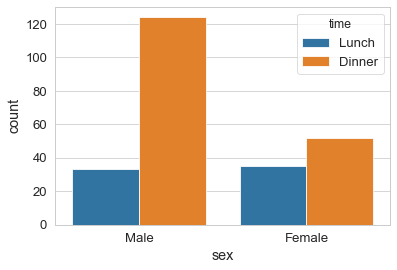

In [138]:
sns.countplot(x='sex',data=tt,hue='time',)

## Box Plot

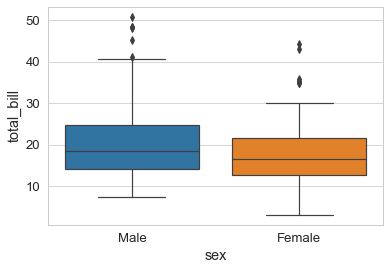

In [139]:
sns.boxplot(x=tt.sex,y=tt.total_bill)

## Violin Plot

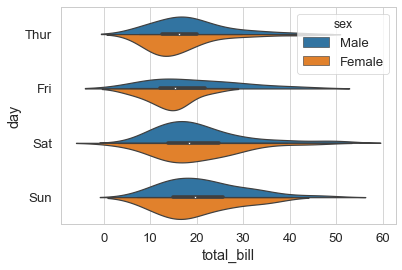

In [144]:
sns.violinplot(x='total_bill',y='day',data=tt,hue='sex',split=True)

## Strip Plot

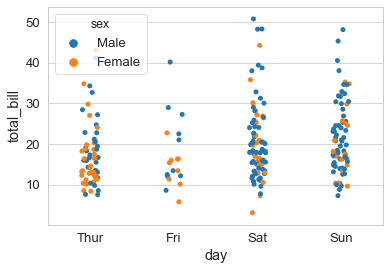

In [150]:
sns.stripplot(x='day',y='total_bill',data=tt,hue='sex')
# dodge is used to separate men and women

# palettes

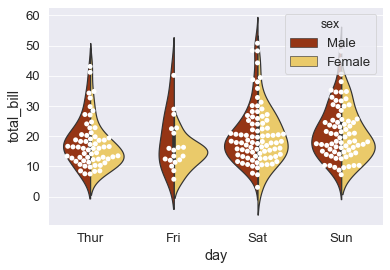

In [166]:
sns.set_style('darkgrid')
sns.violinplot(x='day',y='total_bill',data=tt,hue='sex',split=True,palette='afmhot')
sns.swarmplot(x='day',y='total_bill',data=tt,color='white')

### Matrix plot

# Heatmap

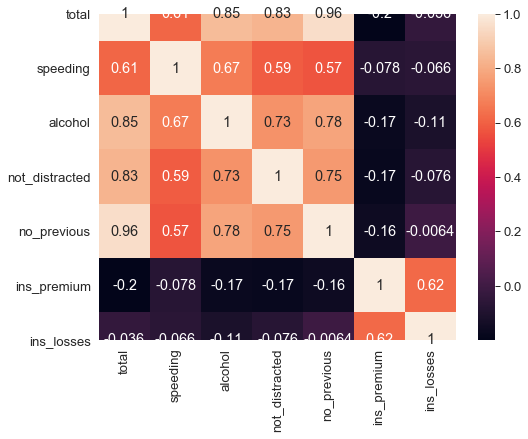

In [174]:
xe=car_df.corr()
plt.figure(figsize=(8,6))
xe
sns.heatmap(xe,annot=True)

#### heatmap type 2 (using pivot table)

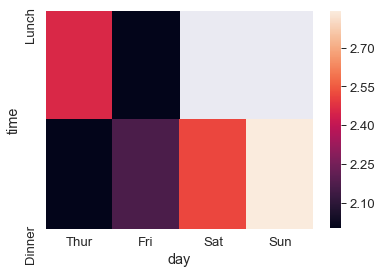

In [187]:
temp=tt.pivot_table(index='time',columns='day',values='size')
sns.heatmap(temp)

## Cluster map

## Facet Grid